# Pymaceuticals Inc.
---

### Analysis

- Study and analysis of animal screening for the potential treatment/treatments to a commonly occurring type of skin cancer

Conducting the study, 249 mice were given various drug regimens over 45 days.  The following analysis script shows the end result of the 45 day trials, utilizing the regimens used.

 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

study_results_complete=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview

study_results_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
mouse_count=study_results["Mouse ID"].nunique()
mouse_count

249

In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_count=study_results["Mouse ID"].count()
mice_count

1893

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
study_results.duplicated(["Mouse ID", "Timepoint"]).sum()
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_results=study_results.drop_duplicates(["Mouse ID"])
clean_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
...,...,...,...,...
245,t565,0,45.0,0
246,i557,0,45.0,0
247,m957,0,45.0,0
248,f966,0,45.0,0


In [16]:
# Checking the number of mice in the clean DataFrame.
mouse_count2=study_results["Mouse ID"].nunique()
mouse_count2

249

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=study_results_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median=study_results_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance=study_results_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std=study_results_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem=study_results_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

sum_stats=pd.DataFrame({"Mean":mean, "Median":median, "Variance":variance, 
                       "STD":std, "SEM":sem})

sum_stats


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
mean=study_results_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median=study_results_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance=study_results_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std=study_results_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem=study_results_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
sum_stats2=pd.DataFrame({"Mean":mean, "Median":median, "Variance":variance, 
                       "STD":std, "SEM":sem})
sum_stats2
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

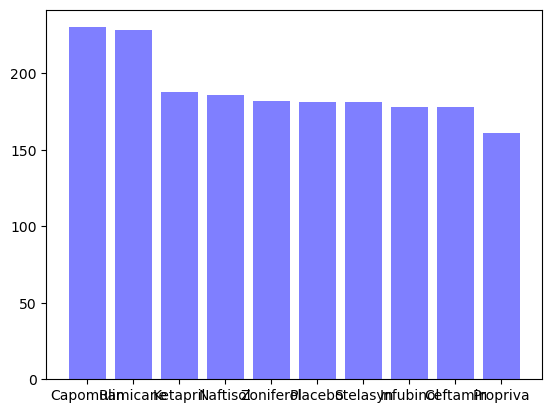

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice=study_results_complete["Drug Regimen"].value_counts()
x_axis = np.arange(len(mice))
plt.bar(mice.index.values, mice.values, color="b", alpha=0.5, align="center")



plt.show()



<AxesSubplot:>

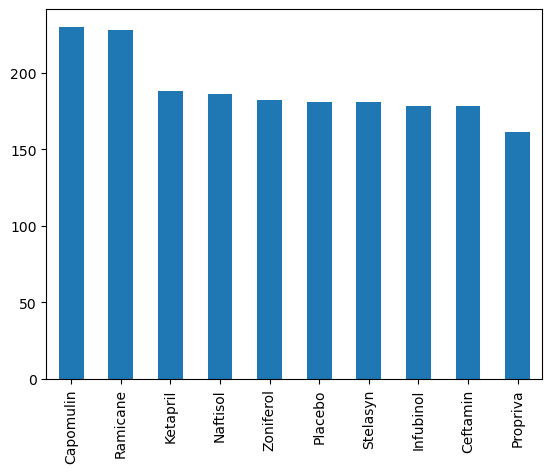

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mice.plot.bar()

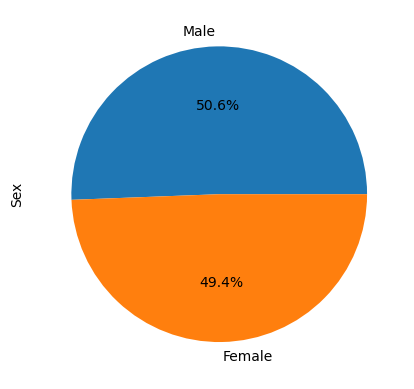

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice=study_results_complete["Sex"].value_counts()
x_axis = np.arange(len(mice))
mice.plot(kind="pie", autopct="%1.1f%%")

plt.show()


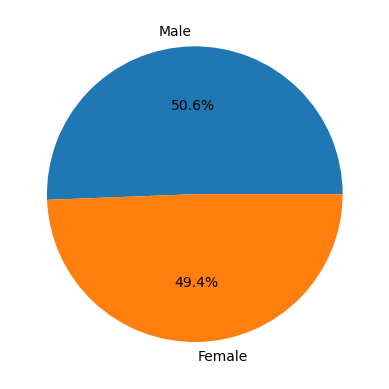

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mice.values, labels=mice.index.values,autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
upper=study_results_complete.groupby("Mouse ID").max()["Timepoint"].reset_index()
# Start by getting the last (greatest) timepoint for each mouse
merged=upper.merge(study_results_complete,on=["Mouse ID", "Timepoint"], how="left")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [26]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

for drug in drugs:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    vol=merged.loc[merged["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    tumor_vol.append(vol)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lq=vol.quantile(.25)
    uq=vol.quantile(.75)
    iqr=uq-lq
    upperb=uq+(1.5*iqr)
    lowerb=lq-(1.5*iqr)
    print(vol.loc[(vol<lowerb)|(vol>upperb)])
    

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


{'whiskers': [<matplotlib.lines.Line2D at 0x238aad53dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x238aad65280>,
 'boxes': [<matplotlib.lines.Line2D at 0x238aad53af0>,
 'medians': [<matplotlib.lines.Line2D at 0x238aad65820>,
 'fliers': [<matplotlib.lines.Line2D at 0x238aad65af0>,
 'means': []}

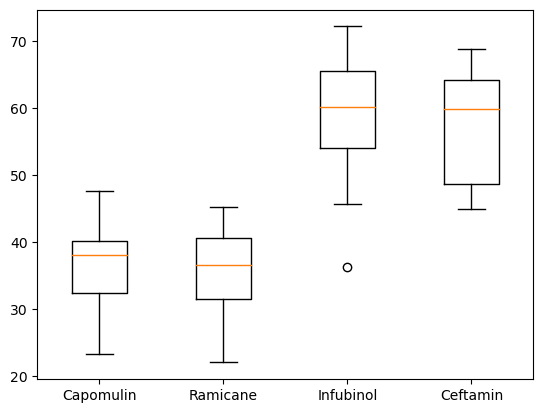

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol, labels=drugs)

## Line and Scatter Plots

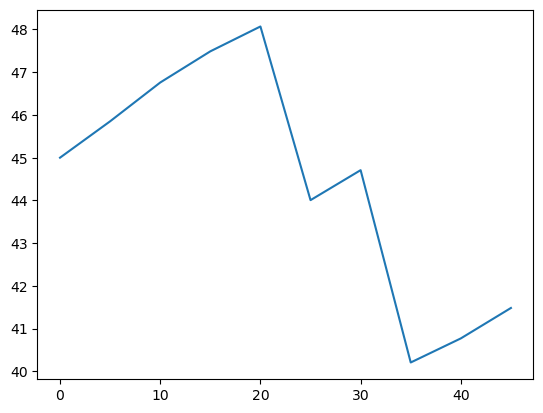

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse=study_results_complete.loc[study_results_complete["Mouse ID"]=="l509"]
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])


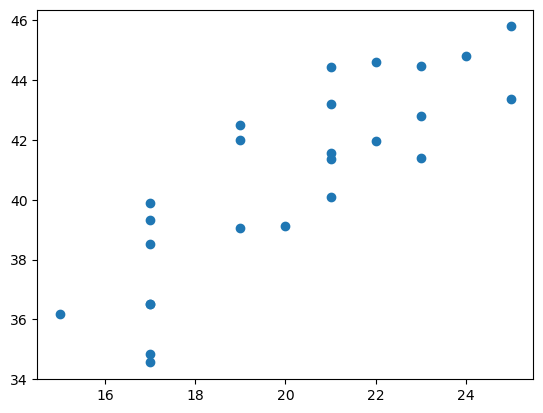

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
ave_tumor_vol=study_results_complete.loc[study_results_complete["Drug Regimen"]=="Capomulin"]
ave_tumor_grp=ave_tumor_vol.groupby("Mouse ID").mean()
plt.scatter(ave_tumor_grp["Weight (g)"],ave_tumor_grp["Tumor Volume (mm3)"])
plt.show()



## Correlation and Regression

The r-squared is: 0.7088568047708723


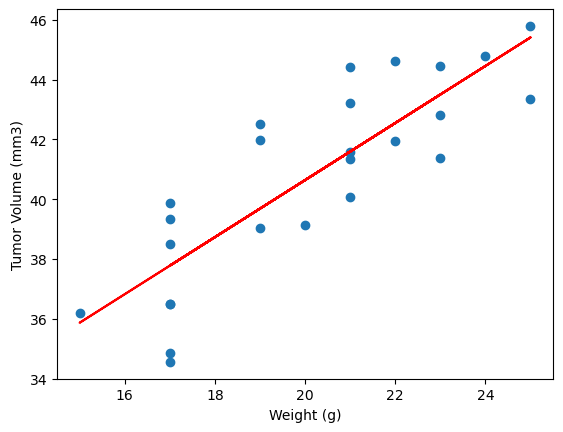

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = ave_tumor_grp["Weight (g)"]
y_values = ave_tumor_grp["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()